In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Open file
efficiency_fva = pd.read_csv('offensive_efficiency_scores_with_past_seasons.csv')

In [5]:
# Change wins and losses to numerical value
dummy = pd.get_dummies(efficiency_fva['WinOrLoss'])
efficiency_fva = pd.concat([efficiency_fva, dummy], axis = 1)
efficiency_fva.head()

,DateOfGame,Team,Opponent,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,WinOrLoss,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
0,12/3/2020,Kaukauna,Appleton North,73,51,20,10,7,11,Win,0.457627,33.406780,35.841356,0,1
1,12/4/2020,Kaukauna,Oshkosh West,72,48,25,3,14,10,Win,0.565217,40.695652,46.709565,0,1
2,12/8/2020,Kaukauna,Appleton East,86,56,27,6,14,15,Win,0.518987,44.632911,50.154937,0,1
3,12/11/2020,Kaukauna,Hortonville,72,55,25,12,14,21,Win,0.500000,36.000000,41.320000,0,1
4,12/12/2020,Kaukauna,De Pere,61,54,21,6,13,7,Loss,0.500000,30.500000,35.440000,1,0


In [6]:
# Create table with numeric values 
efficiency_fva_num = efficiency_fva.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [7]:
# Differences in wins and losses
win = efficiency_fva_num[efficiency_fva_num.Win == 1].drop(columns = ['Win', 'Loss'])
loss = efficiency_fva_num[efficiency_fva_num.Loss == 1].drop(columns = ['Win', 'Loss'])
win.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,265.000000,265.000000,265.000000,265.000000,265.00000,265.000000,265.000000,265.000000,265.000000
mean,74.158491,52.943396,26.837736,8.547170,15.70566,10.596226,0.598262,44.908158,52.105711
std,11.640665,8.878419,5.639425,4.188576,4.88467,4.165968,0.074843,11.396228,13.701220
min,47.000000,35.000000,14.000000,0.000000,4.00000,1.000000,0.403226,20.210526,23.090526
25%,66.000000,46.000000,23.000000,5.000000,12.00000,8.000000,0.546875,36.046154,42.522162
50%,74.000000,53.000000,27.000000,8.000000,16.00000,11.000000,0.596774,44.054795,52.073239
75%,82.000000,59.000000,31.000000,11.000000,18.00000,13.000000,0.652778,51.973684,60.637091
max,108.000000,78.000000,43.000000,24.000000,30.00000,25.000000,0.800000,82.329545,97.823182


In [8]:
# Now losses
loss.describe()

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,59.531250,49.890625,21.510417,6.864583,12.135417,13.531250,0.488263,29.666168,34.305898
std,10.885365,7.483561,4.833337,3.543654,4.371780,5.845217,0.083452,9.304092,10.959669
min,20.000000,25.000000,9.000000,0.000000,0.000000,0.000000,0.219512,4.390244,4.390244
25%,53.000000,44.000000,18.000000,4.000000,9.000000,9.000000,0.420628,22.447262,25.315735
50%,60.000000,50.000000,21.000000,7.000000,12.000000,13.000000,0.486299,29.335784,33.849115
75%,66.000000,54.250000,24.250000,9.000000,15.000000,17.000000,0.550975,36.145115,42.060533
max,85.000000,72.000000,35.000000,21.000000,28.000000,35.000000,0.693878,54.296703,68.561319


In [9]:
# Correlations
efficiency_correlations = efficiency_fva_num.corr()
efficiency_correlations

,PointsScored,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,Loss,Win
PointsScored,1.000000,0.541717,0.868066,0.251138,0.561997,-0.212386,0.748927,0.940570,0.917318,-0.538237,0.538237
FieldGoalAttempts,0.541717,1.000000,0.681549,0.598933,0.400513,-0.095750,0.281491,0.457116,0.459524,-0.178555,0.178555
FieldGoalsMade,0.868066,0.681549,1.000000,0.319055,0.633123,-0.150924,0.783934,0.889259,0.886747,-0.444144,0.444144
OffensiveRebounds,0.251138,0.598933,0.319055,1.000000,0.225210,0.087900,0.248379,0.270520,0.276293,-0.207151,0.207151
Assists,0.561997,0.400513,0.633123,0.225210,1.000000,0.007773,0.678446,0.661662,0.738395,-0.353312,0.353312
Turnovers,-0.212386,-0.095750,-0.150924,0.087900,0.007773,1.000000,-0.433957,-0.339903,-0.313052,0.281925,-0.281925
OffensiveEfficiency,0.748927,0.281491,0.783934,0.248379,0.678446,-0.433957,1.000000,0.914544,0.924178,-0.569327,0.569327
EfficientPointsScored,0.940570,0.457116,0.889259,0.270520,0.661662,-0.339903,0.914544,1.000000,0.992743,-0.580763,0.580763
RawEOP,0.917318,0.459524,0.886747,0.276293,0.738395,-0.313052,0.924178,0.992743,1.000000,-0.572099,0.572099
Loss,-0.538237,-0.178555,-0.444144,-0.207151,-0.353312,0.281925,-0.569327,-0.580763,-0.572099,1.000000,-1.000000


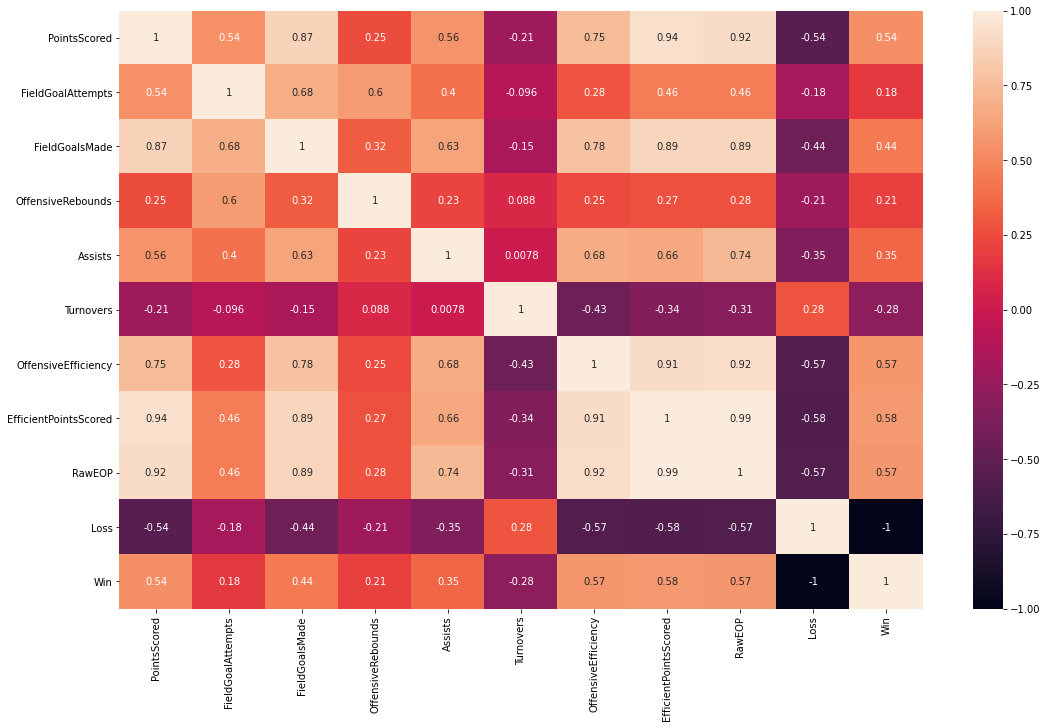

In [10]:
# Correlation heatmap
plt.figure(figsize=(18,11))
sns.heatmap(efficiency_correlations, annot = True );

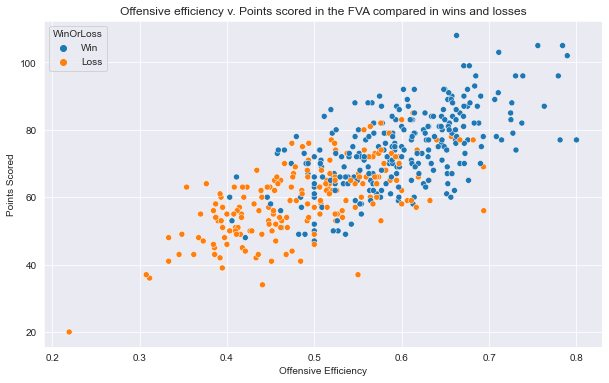

In [11]:
# Create visual for offensive efficency v. points scored
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.scatterplot(x="OffensiveEfficiency", 
                y="PointsScored", 
                hue="WinOrLoss",
                data=efficiency_fva)
plt.xlabel("Offensive Efficiency")
plt.ylabel("Points Scored")
plt.title("Offensive efficiency v. Points scored in the FVA compared in wins and losses");

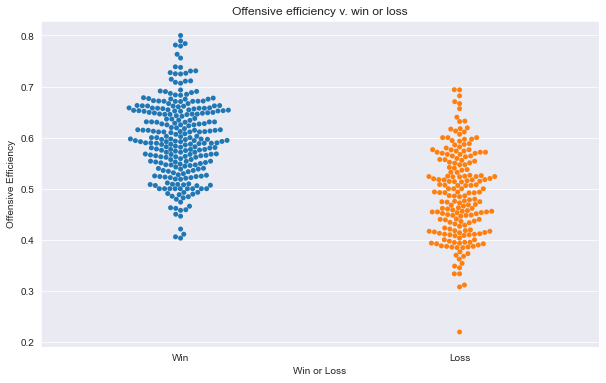

In [12]:
# Swarmplot for wins and losses with offensive efficency
plt.figure(figsize=(10,6))
sns.swarmplot(x=efficiency_fva['WinOrLoss'],
              y=efficiency_fva['OffensiveEfficiency'])
plt.ylabel("Offensive Efficiency")
plt.xlabel("Win or Loss")
plt.title("Offensive efficiency v. win or loss");

In [13]:
# Creating data frames for teams 
appleton_east = efficiency_fva[efficiency_fva.Team == 'Appleton East']
appleton_north = efficiency_fva[efficiency_fva.Team == 'Appleton North']
appleton_west = efficiency_fva[efficiency_fva.Team == 'Appleton West']
fond_du_lac = efficiency_fva[efficiency_fva.Team == 'Fond du Lac']
hortonville = efficiency_fva[efficiency_fva.Team == 'Hortonville']
kaukauna = efficiency_fva[efficiency_fva.Team == 'Kaukauna']
kimberly = efficiency_fva[efficiency_fva.Team == 'Kimberly']
neenah = efficiency_fva[efficiency_fva.Team == 'Neenah']
oshkosh_north = efficiency_fva[efficiency_fva.Team == 'Oshkosh North']
oshkosh_west = efficiency_fva[efficiency_fva.Team == 'Oshkosh West']

In [14]:
# Creating data frames for teams and numeric values
appleton_east_num = appleton_east.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_num = appleton_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_num = appleton_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_num = fond_du_lac.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_num = hortonville.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_num = kaukauna.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_num = kimberly.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_num = neenah.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_num = oshkosh_north.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_num = oshkosh_west.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [15]:
# Creating data frames for teams to see what they give up 
appleton_east_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton East']
appleton_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton North']
appleton_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Appleton West']
fond_du_lac_opp = efficiency_fva[efficiency_fva.Opponent == 'Fond du Lac']
hortonville_opp = efficiency_fva[efficiency_fva.Opponent == 'Hortonville']
kaukauna_opp = efficiency_fva[efficiency_fva.Opponent == 'Kaukauna']
kimberly_opp = efficiency_fva[efficiency_fva.Opponent == 'Kimberly']
neenah_opp = efficiency_fva[efficiency_fva.Opponent == 'Neenah']
oshkosh_north_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh North']
oshkosh_west_opp = efficiency_fva[efficiency_fva.Opponent == 'Oshkosh West']


In [16]:
# Create numeric values
appleton_east_opp_num = appleton_east_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_north_opp_num = appleton_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
appleton_west_opp_num = appleton_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
fond_du_lac_opp_num = fond_du_lac_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
hortonville_opp_num = hortonville_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kaukauna_opp_num = kaukauna_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
kimberly_opp_num = kimberly_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
neenah_opp_num = neenah_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_north_opp_num = oshkosh_north_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)
oshkosh_west_opp_num = oshkosh_west_opp.drop(columns = ['DateOfGame', 'Team', 'Opponent', 'WinOrLoss'], axis = 1)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression

In [18]:
# Features for machine learning model
base_features = ['FieldGoalAttempts', 'FieldGoalsMade', 'OffensiveRebounds', 'Assists', 'Turnovers', 'OffensiveEfficiency', 'EfficientPointsScored', 'RawEOP', 'PointsScored']
X = efficiency_fva_num[base_features]
X

,FieldGoalAttempts,FieldGoalsMade,OffensiveRebounds,Assists,Turnovers,OffensiveEfficiency,EfficientPointsScored,RawEOP,PointsScored
0,51,20,10,7,11,0.457627,33.406780,35.841356,73
1,48,25,3,14,10,0.565217,40.695652,46.709565,72
2,56,27,6,14,15,0.518987,44.632911,50.154937,86
3,55,25,12,14,21,0.500000,36.000000,41.320000,72
4,54,21,6,13,7,0.500000,30.500000,35.440000,61
...,...,...,...,...,...,...,...,...,...
452,52,23,9,11,10,0.531250,38.250000,42.691250,72
453,54,27,6,13,8,0.579710,40.579710,46.307246,70
454,44,23,3,13,10,0.562500,37.687500,43.245000,67
455,55,29,8,20,21,0.556818,44.545455,53.009091,80


In [19]:
# What we are trying to predict: Total points scored 
y = efficiency_fva.Win
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Win, dtype: uint8

In [33]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)
print(train_X.shape, val_X.shape, train_y.shape, val_y.shape)

(365, 9) (92, 9) (365,) (92,)


In [34]:
# Best model
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, train_X, train_y, cv = 10)
print(cv)
print(cv.mean())

[0.7027027  0.72972973 0.75675676 0.78378378 0.75675676 0.77777778
 0.83333333 0.72222222 0.86111111 0.80555556]
0.772972972972973


In [35]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, train_X, train_y, cv = 10)
print(cv)
print(cv.mean())

[0.72972973 0.67567568 0.89189189 0.75675676 0.64864865 0.80555556
 0.66666667 0.72222222 0.77777778 0.69444444]
0.7369369369369368


In [36]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, train_X, train_y, cv = 10)
print(cv)
print(cv.mean())

[0.78378378 0.72972973 0.86486486 0.78378378 0.75675676 0.77777778
 0.69444444 0.75       0.80555556 0.72222222]
0.7668918918918919


In [73]:
# Second best
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
cv = cross_val_score(rf, train_X, train_y, cv = 10)
print('Train Scores :' + cv.mean())
cv_test = cross_val_score(rf, val_X, val_y, cv = 10)
print('Test Scores:' + cv_test.mean())

TypeError: can only concatenate str (not "numpy.float64") to str

In [69]:
svc = SVC(probability = True)
cv_train = cross_val_score(svc, train_X, train_y, cv = 10)
print(cv)
print(cv.mean())
cv_test = cross_val_score(svc, val_X, val_y, cv = 10)
print(cv_test)
print(cv_test.mean())

[0.13664106 0.27323819 0.33305876 0.35198742 0.25469378 0.14280749
 0.32368847 0.17404751 0.38620983 0.28612098]
0.2662493490990223
[0.8        0.7        0.77777778 0.66666667 0.88888889 0.77777778
 0.55555556 0.77777778 0.88888889 1.        ]
0.7833333333333334


In [58]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, train_X, train_y, cv = 10)
print(cv)
print(cv.mean())

[10:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [67]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)
cv = cross_val_score(lasso, train_X, train_y, cv = 10)
print(cv)
print(cv.mean())

[0.13664106 0.27323819 0.33305876 0.35198742 0.25469378 0.14280749
 0.32368847 0.17404751 0.38620983 0.28612098]
0.2662493490990223


In [66]:
reg = LinearRegression()
cv = cross_val_score(reg, train_X, train_y, cv = 10)
print(cv)
print(cv.mean())

[0.16010168 0.35740454 0.37917337 0.31848284 0.35298306 0.1604475
 0.4549556  0.28306742 0.42217548 0.36235945]
0.32511509363549707


ValueError: x and y must be the same size

In [60]:
# Feature weights for Logistic Regression model
import eli5
from eli5.sklearn import PermutationImportance
lr.fit(train_X, train_y)
perm = PermutationImportance(lr, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.3326 ± 0.1188,PointsScored
0.1783 ± 0.0897,FieldGoalsMade
0.1326 ± 0.0348,OffensiveRebounds
0.1174 ± 0.0693,FieldGoalAttempts
0.0978 ± 0.1056,EfficientPointsScored
0.0804 ± 0.0560,Turnovers
0.0652 ± 0.0687,Assists
0.0174 ± 0.0325,RawEOP
0 ± 0.0000,OffensiveEfficiency


In [61]:
# Feature weights for Random Forest model 
rf.fit(train_X, train_y)
perm2 = PermutationImportance(rf, random_state = 1).fit(val_X, val_y)
eli5.show_weights(perm2, feature_names = val_X.columns.tolist())

Weight,Feature
0.0217 ± 0.0645,RawEOP
0.0217 ± 0.0496,EfficientPointsScored
0.0196 ± 0.0422,OffensiveRebounds
0.0196 ± 0.0254,PointsScored
0.0196 ± 0.0374,OffensiveEfficiency
0.0130 ± 0.0163,Assists
0.0087 ± 0.0348,FieldGoalAttempts
0.0065 ± 0.0353,FieldGoalsMade
-0.0152 ± 0.0403,Turnovers


In [85]:
# For KNeighbors model 
data_for_prediction = val_X.iloc[0:]  # use 1 row of data here. Could use multiple rows if desired
percent_chances = rf.predict_proba(data_for_prediction)
percent_chances = pd.DataFrame(percent_chances)
percent_chances = percent_chances.rename(columns = {0 :'% chance of loss', 1: '% chance of win'})
#percent_chances
val_X = pd.DataFrame(val_X)
val_y = pd.DataFrame(val_y)
total_val = [val_X, val_y]
total_val = pd.concat(total_val, axis = 1)
total_val = total_val.reset_index(drop=True)
predictions = [total_val, percent_chances]
predictions = pd.concat(predictions, axis = 1)
predictions.to_csv('WinOrLossPredictions.csv')


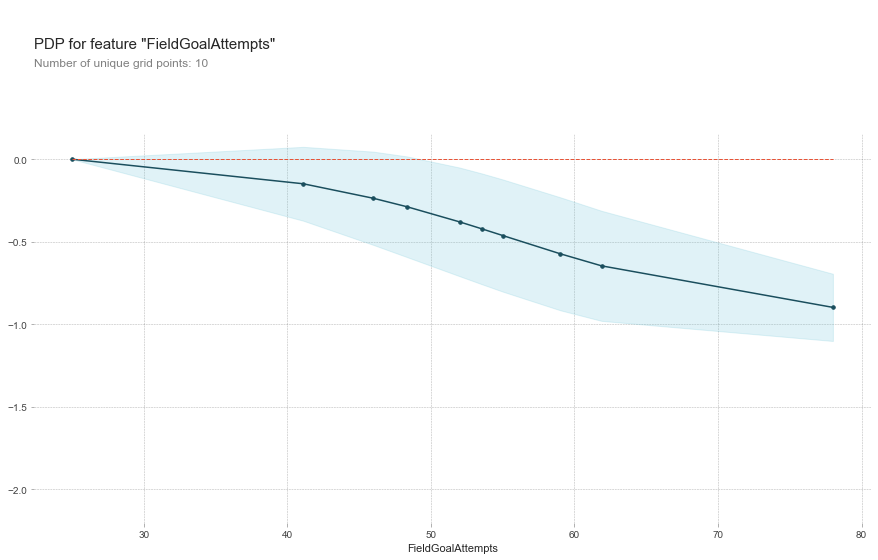

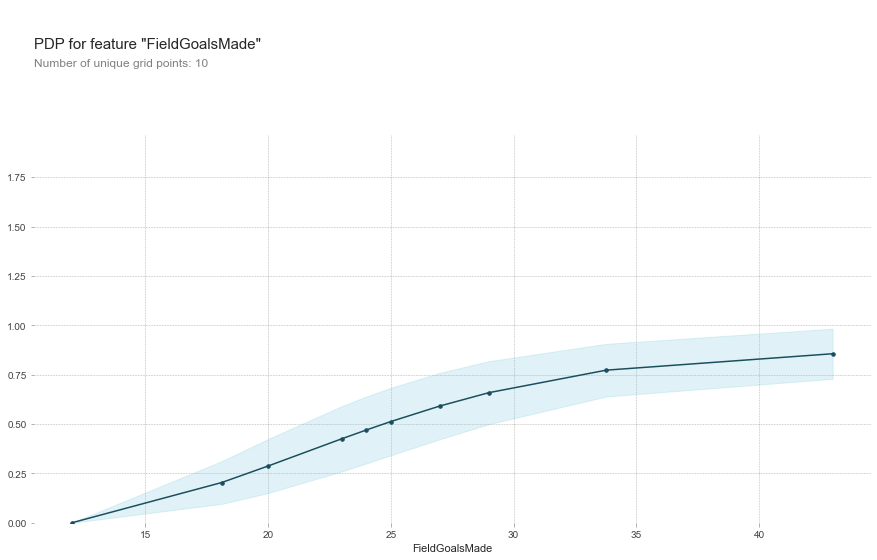

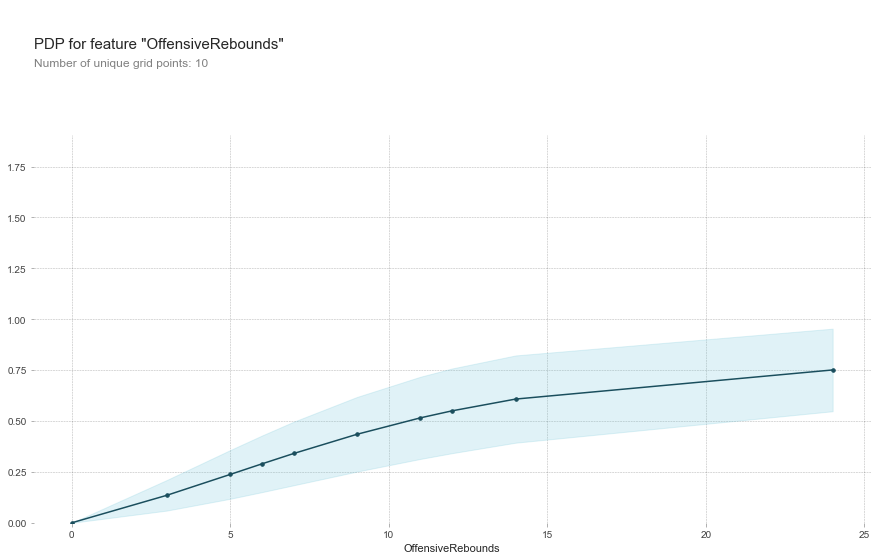

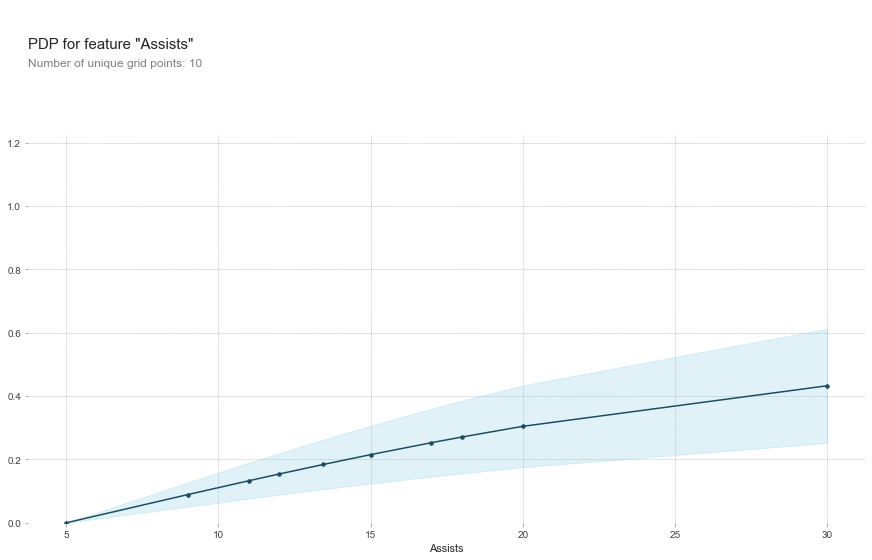

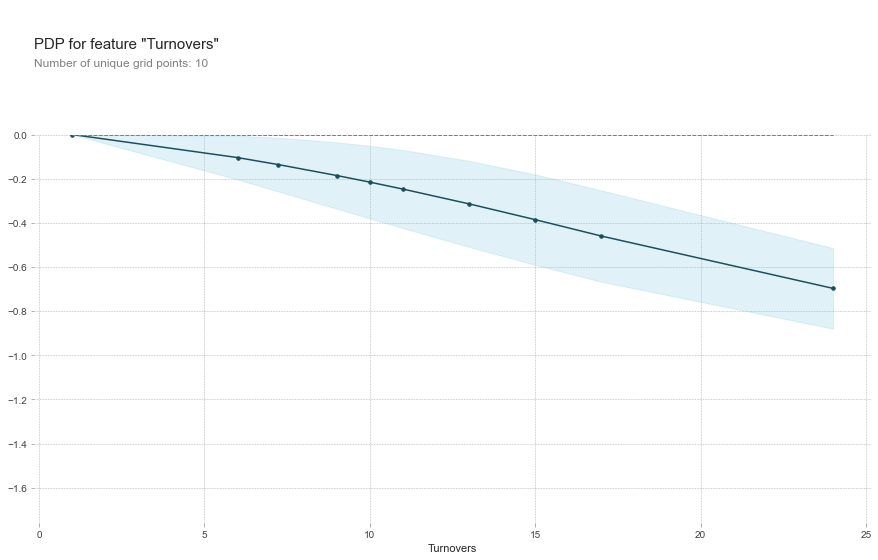

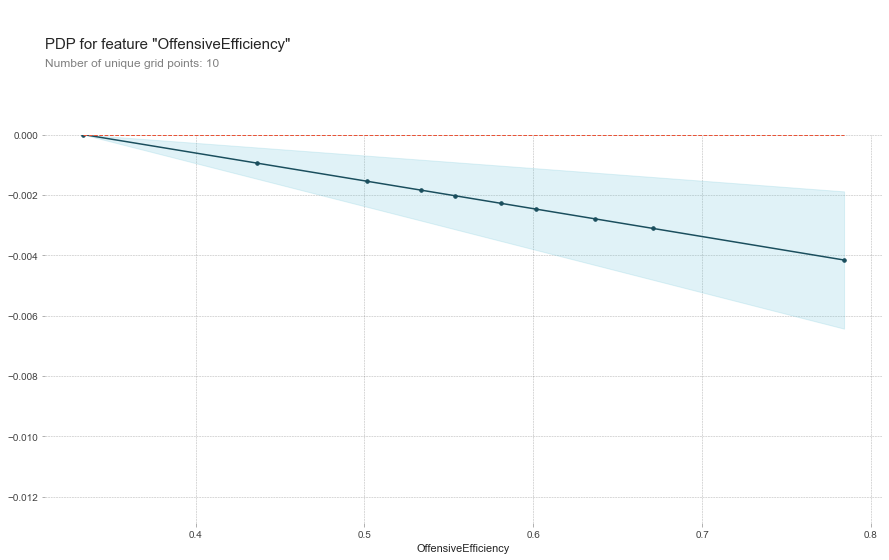

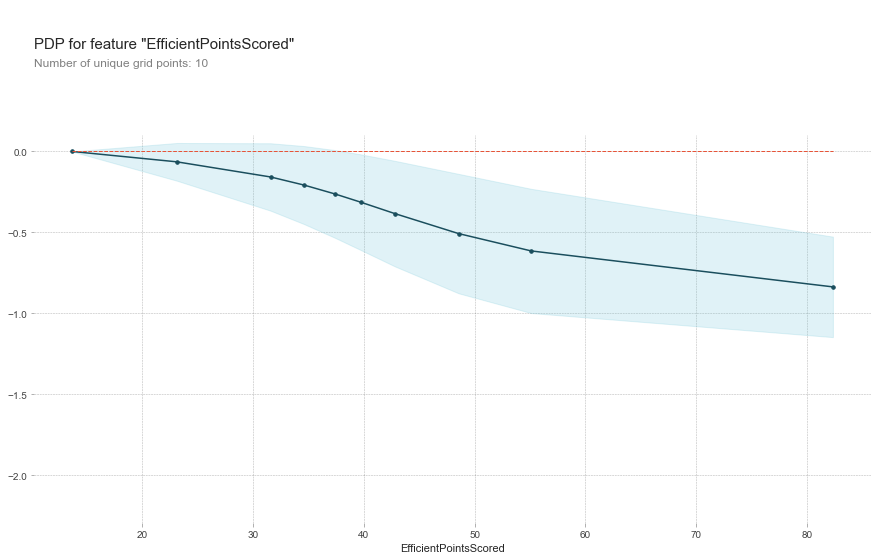

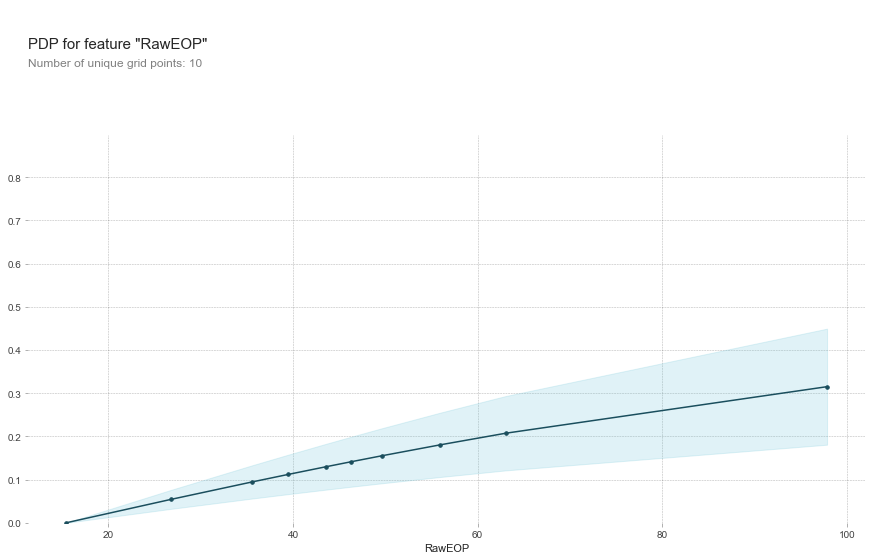

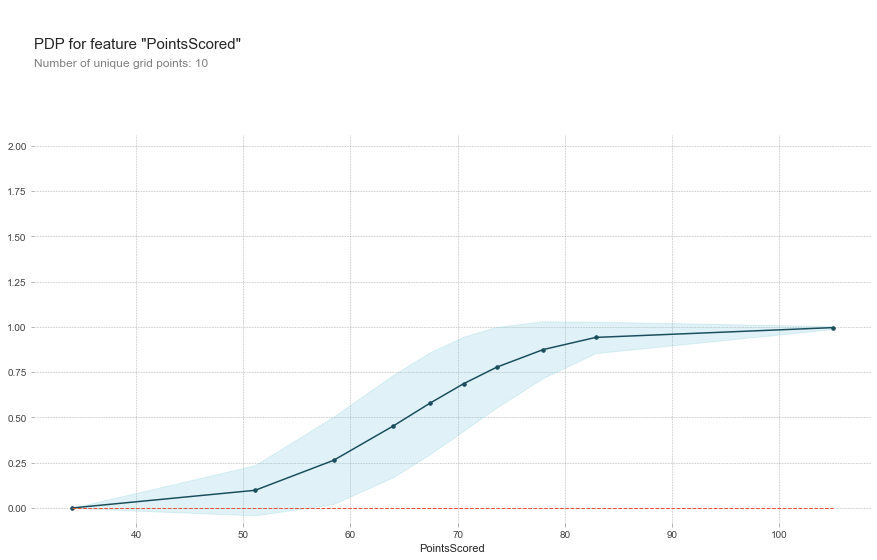

In [62]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = lr, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

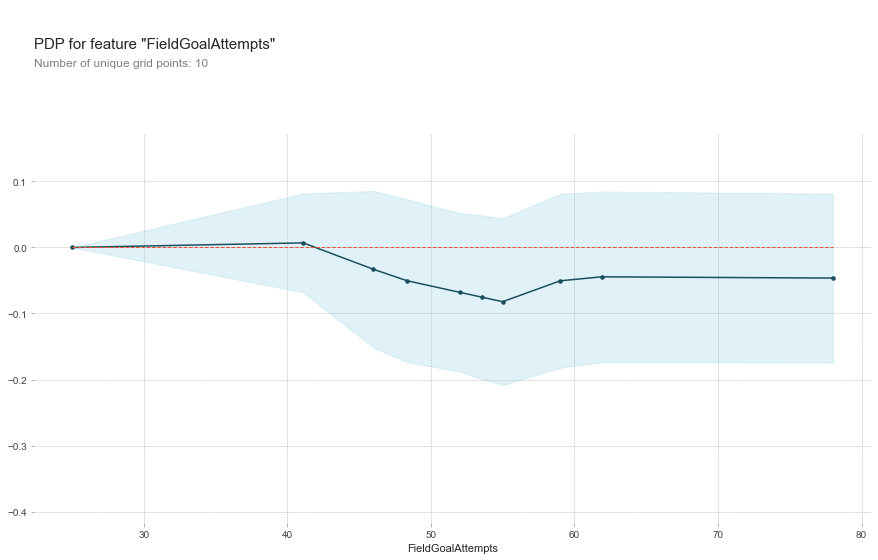

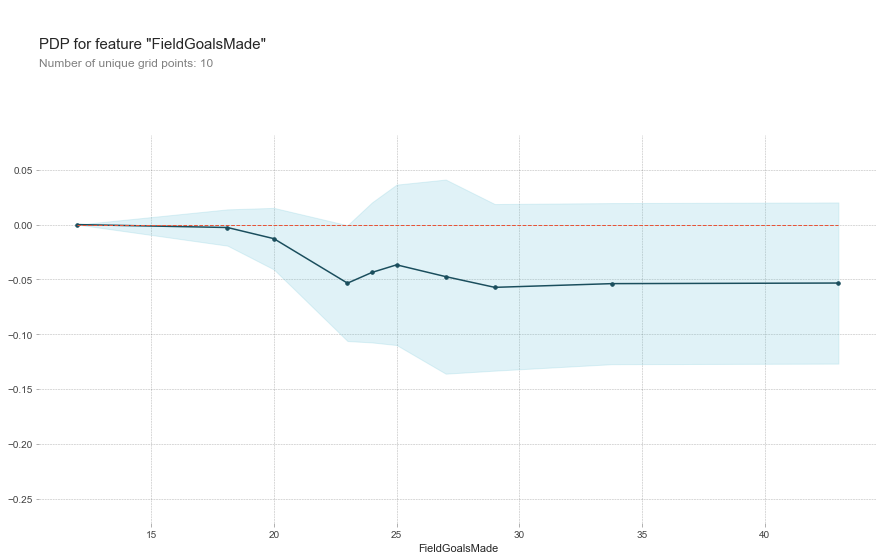

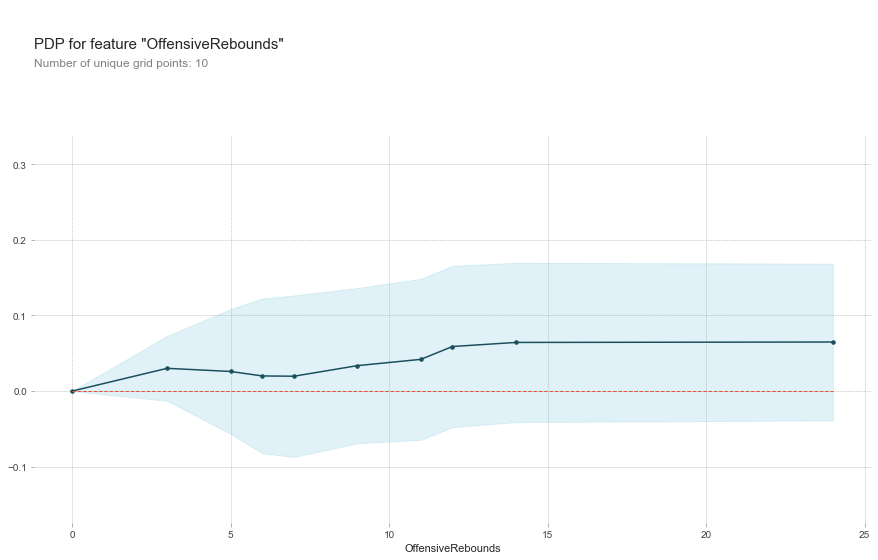

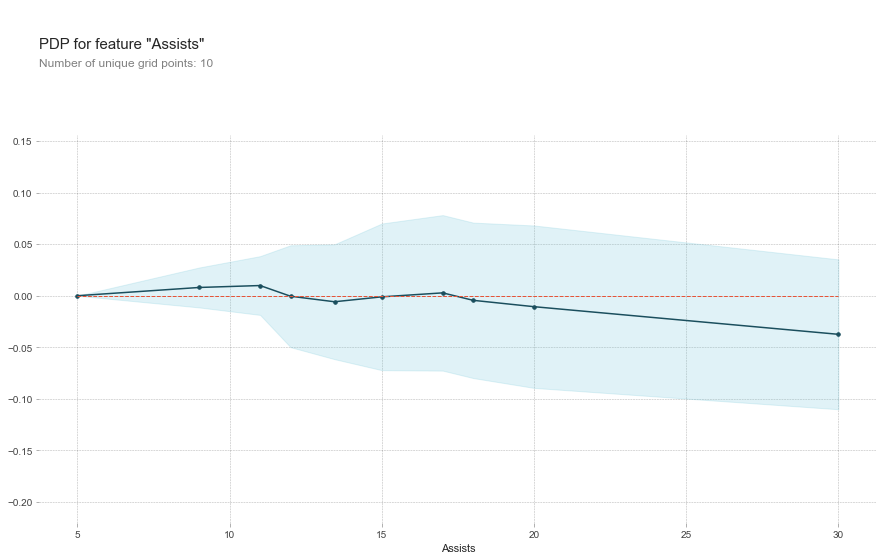

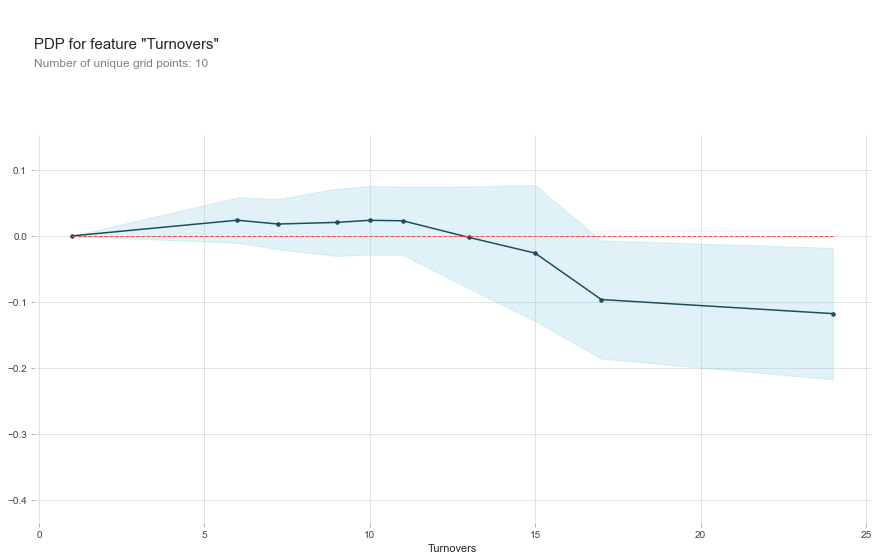

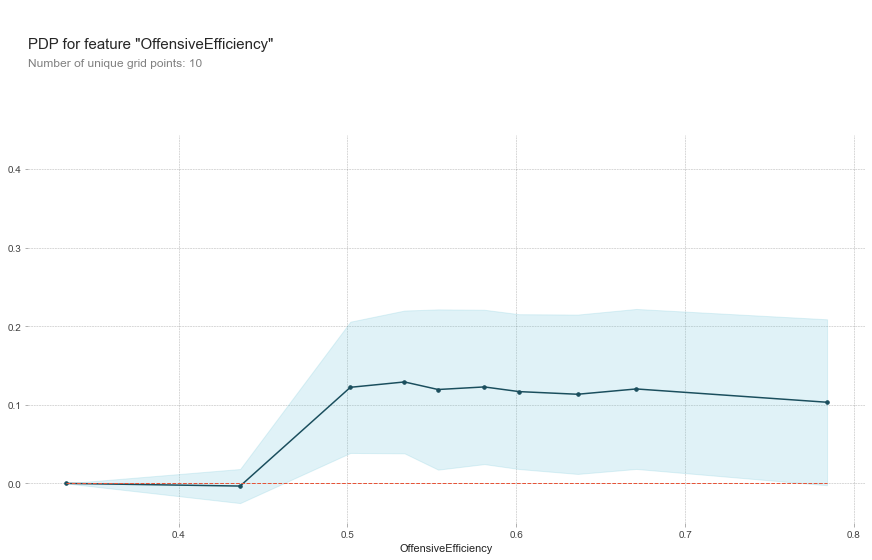

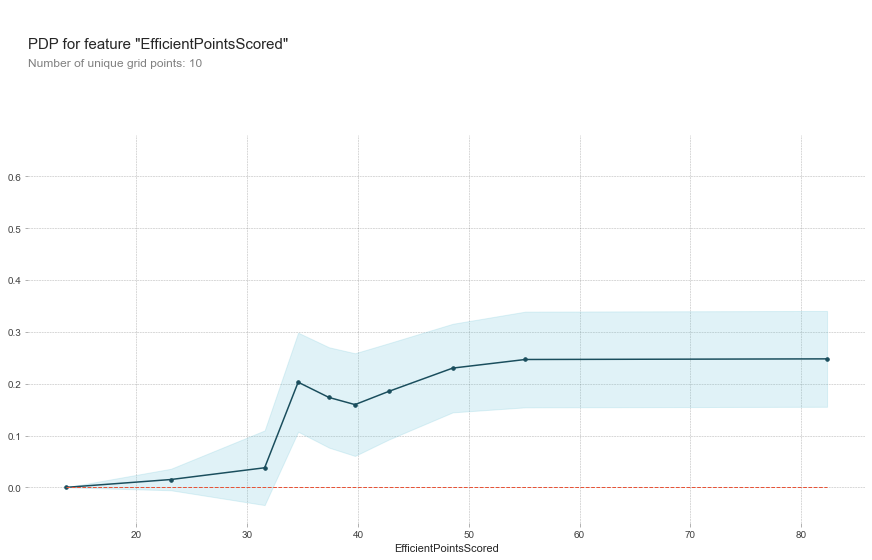

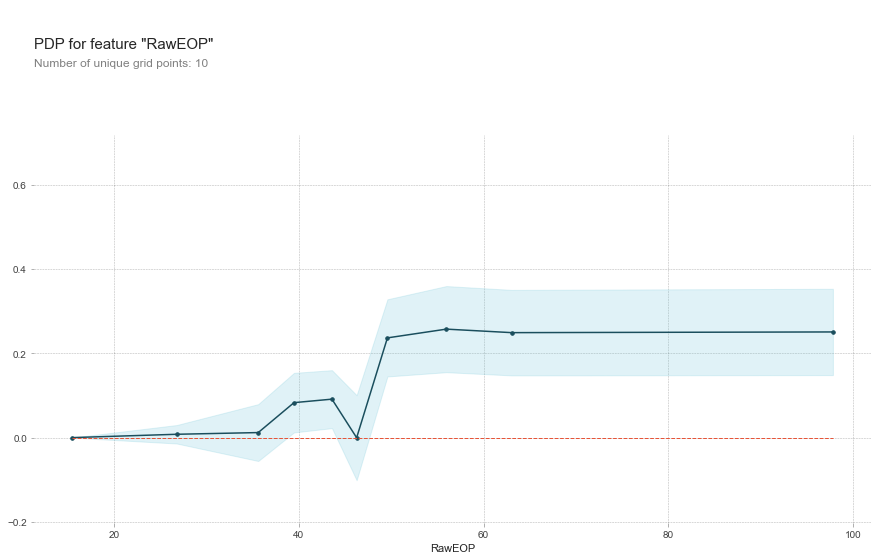

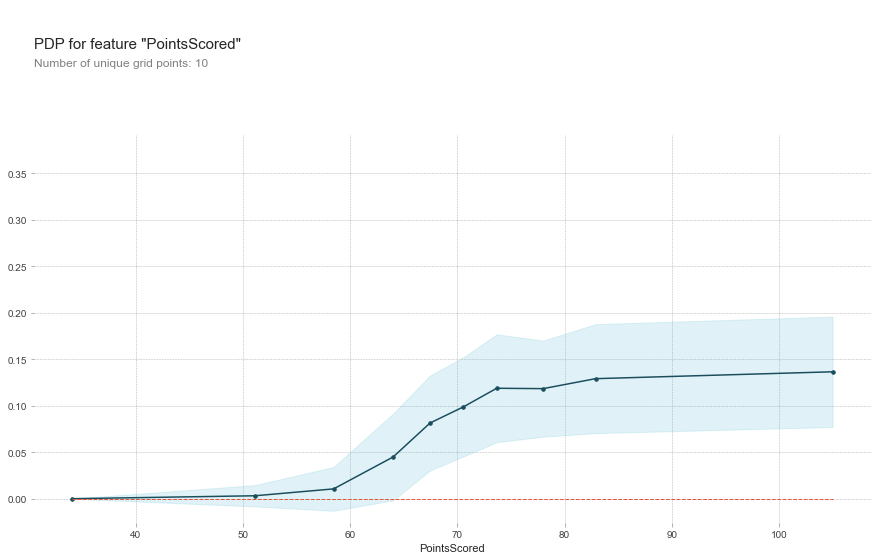

In [63]:
from pdpbox import pdp, get_dataset, info_plots
for feat_name in base_features:
    pdp_dist = pdp.pdp_isolate(model = rf, dataset = val_X, model_features = base_features, feature = feat_name)
    pdp.pdp_plot(pdp_dist, feat_name)
    plt.show()

1. feature 6 (0.175532)
2. feature 7 (0.161052)
3. feature 5 (0.142036)
4. feature 8 (0.119991)
5. feature 1 (0.092616)
6. feature 0 (0.085175)
7. feature 4 (0.083990)
8. feature 3 (0.070098)
9. feature 2 (0.069510)


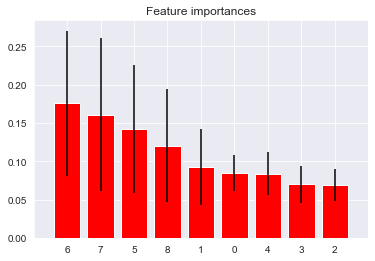

In [64]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(train_X, train_y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()